## EDA Student Performance Indicator

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 3) Dataset Information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

In [1]:
#Important libraries to intsall
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the dataset

In [2]:
st =pd.read_csv("E:\PRANAV\Study\Projects\EDA\stud.csv")

In [3]:
st.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
st.shape
# We have 1000 entries of dataset with 8 features

(1000, 8)

### Data check to perform before analysis
- Check Missing Values
- Check Duplicates
- Check Datatypes
- Check number of unique values of each column
- Check Statistics of dataset
- Check various categories present in the different categorical column

In [5]:
st.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### Insight or Observation
- There are no missing values

In [6]:
st.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
st.duplicated().sum()

0

### Insight or Observation
- There are no duplicates values in the dataset

In [8]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Insight or Observation
- There are 5 Catergorical features and 3 numerical fetures in the dataset

In [9]:
st.nunique()
# checking the number of unique values of each datset

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
st.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight or Observation
- From the above description of numerical data all the means are very close to each other between 66 to 69.
- All the standard deviation are also close between 14.6 to 15.19.
- While there is a minimum of 0 for maths, others are having 17 and 10 values.

In [11]:
# Exploring more information about the dataset
st.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Segregate Numerical and categorical features

In [12]:
n_feature= [feature for feature in st.columns if st[feature].dtype!='O']
c_feature= [feature for feature in st.columns if st[feature].dtype=='O']

In [13]:
n_feature

['math_score', 'reading_score', 'writing_score']

In [14]:
c_feature

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

### Data analysis
- Agregate the total score with mean

In [15]:
st['total_score']=st['math_score']+ st[ 'reading_score']+ st['writing_score']

In [16]:
st.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [17]:
st['average']=st['total_score']/3

In [18]:
st.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [19]:
# Explore more visualisation

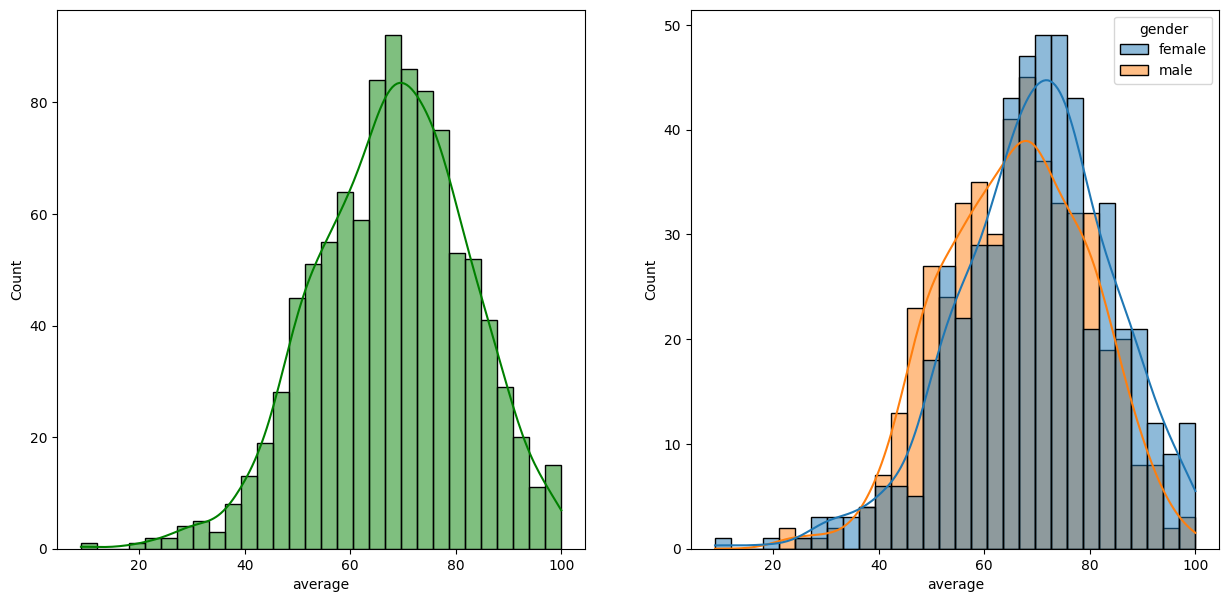

In [20]:
fig,axis = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=st, x='average',bins=30,kde=True, color='g')
plt.subplot(122)
sns.histplot(data=st, x='average',bins=30,kde=True, hue='gender')
plt.show()

### Insights or Observations
-Female students tend to perform well than male students

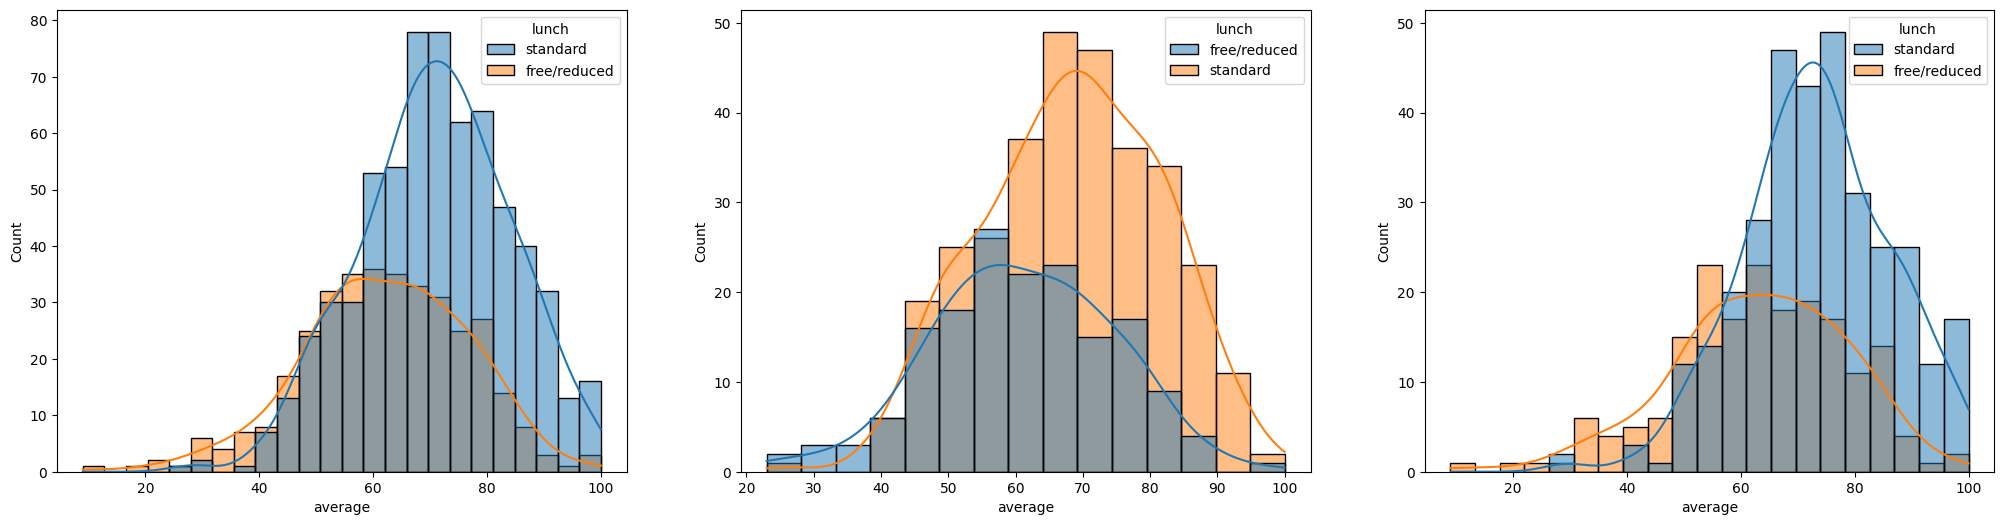

In [21]:
fig, axis = plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=st,x='average', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=st[st.gender=='male'], x='average', kde =True, hue='lunch')
plt.subplot(133)
sns.histplot(data=st[st.gender=='female'], x='average',kde=True, hue='lunch')
plt.show()

### Insights or Observations
- Standard lunch helps students perform well in exam
- Standard lunch helps perform well in exam be it a male or female

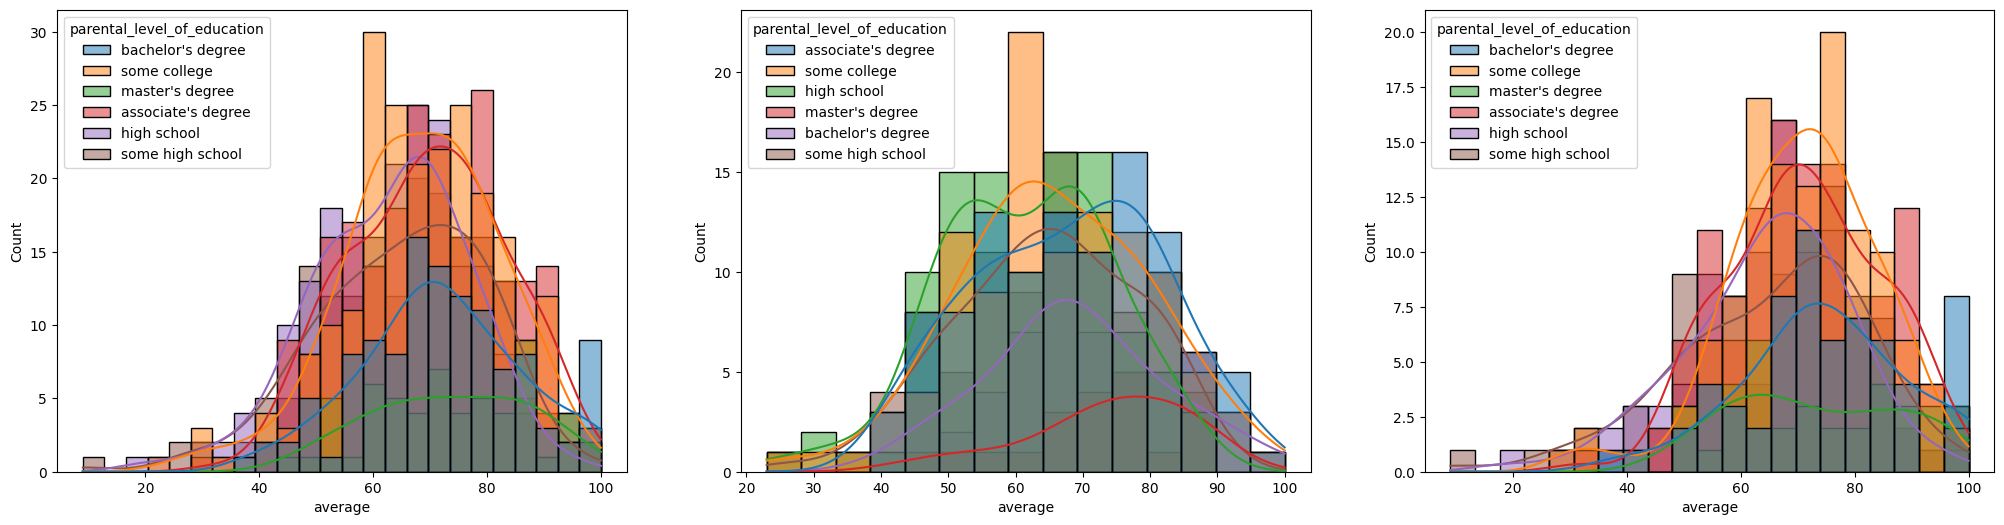

In [22]:
fig, axis = plt.subplots(1,3, figsize=(25,6))
plt.subplot(131)
sns.histplot(data=st,x='average', kde=True, hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=st[st.gender=='male'], x='average', kde =True, hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=st[st.gender=='female'], x='average',kde=True, hue='parental_level_of_education')
plt.show()

### Insights or Observations
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

C:\Users\holis\AppData\Local\Temp\ipykernel_32016\2442291638.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\holis\AppData\Local\Temp\ipykernel_32016\2442291638.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\holis\AppData\Local\Temp\ipykernel_32016\2442291638.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


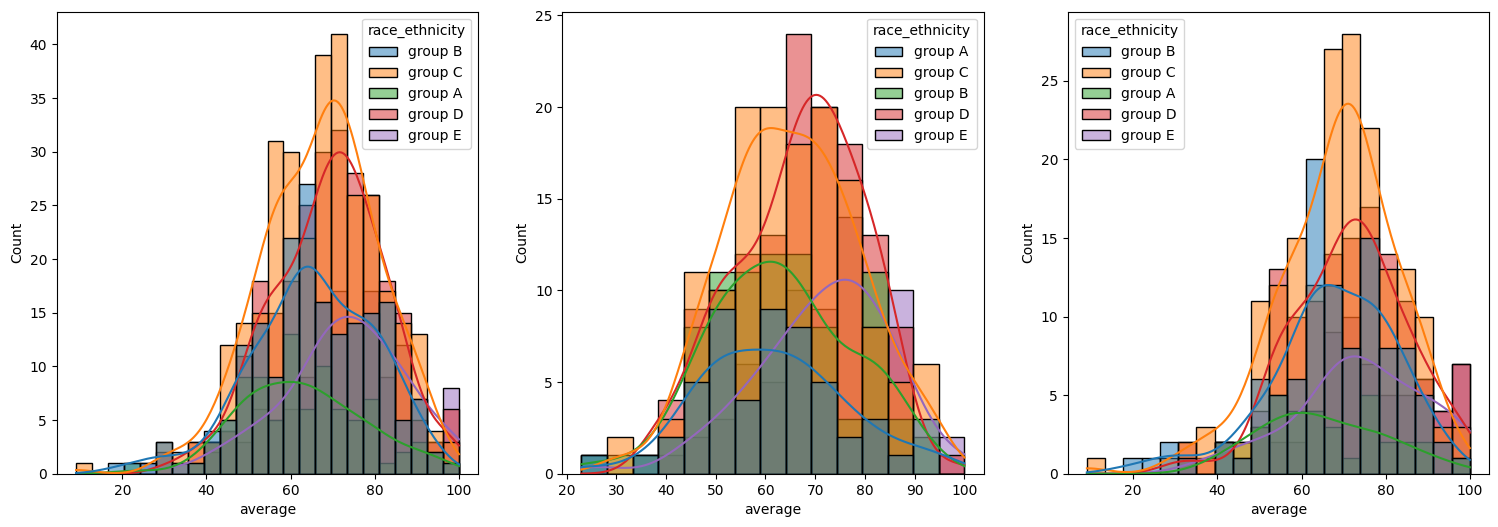

In [23]:
fig, axis = plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=st,x='average', kde=True, hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=st[st.gender=='male'], x='average', kde =True, hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=st[st.gender=='female'], x='average',kde=True, hue='race_ethnicity')
plt.show()

####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

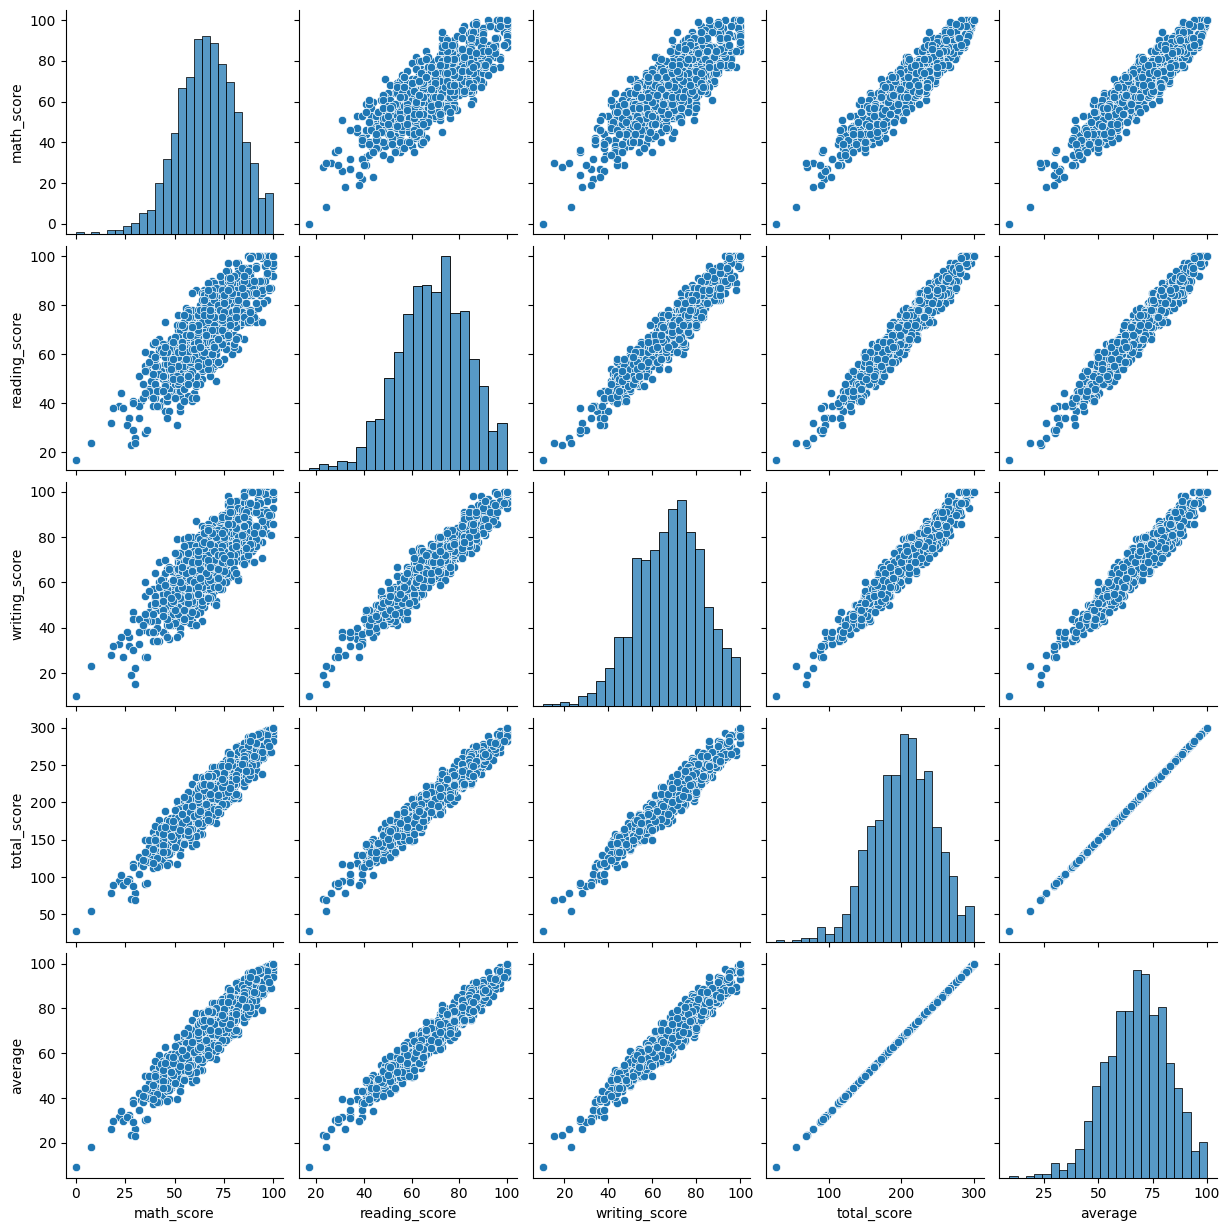

In [24]:
sns.pairplot(st)

C:\Users\holis\AppData\Local\Temp\ipykernel_32016\797486976.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(st.corr(), annot=True)


<Axes: >

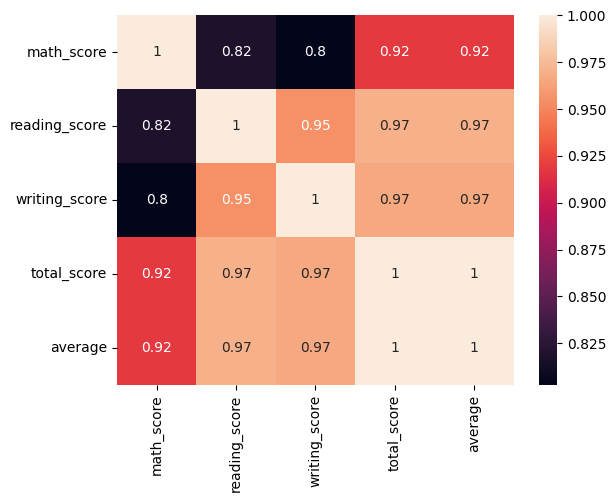

In [25]:
sns.heatmap(st.corr(), annot=True)

####  Insights
- All the features are highly positive correlated with each other